In [1]:
# Import Minst Data
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [2]:
# Display data and each data has 784 features.
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [3]:
# Get Training data and its labels
X, y = mnist["data"], mnist["target"]

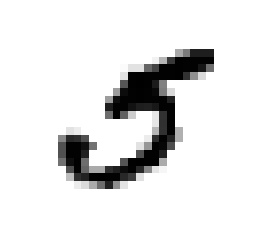

In [5]:
# Draw pic 36000
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [6]:
# There are 70000 in the dataset, first 60000 are used for training, 10000 are used for testing.
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

In [7]:
import numpy as np

# Shuffle the training dataset for the diversity of cross-validation
shuffle_index = np.random.permutation(60000) # Reorder the sequence with randomly order in the length of 60000
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [8]:
# Build a binary classifier with SGD classifier for 5 detection
from sklearn.linear_model import SGDClassifier

# Prepare binary labels
y_train_5 = (y_train == 5)
y_test_5  = (y_test  == 5)

# random_state decides the length of sequence of random samples.
# The default value is None and means the number of random samples is decided by numpy.random
sgd_clf = SGDClassifier(random_state=42) 
sgd_clf.fit(X_train, y_train_5)

/Users/yudelin/.pyenv/versions/hands-on-ML/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

### Note: What is SGD?

SGD, a.k.a **Stochastic Gradient Descent** is a *gradient descent algorithm* that selects random numbers of dataset as samples for gradient calculation.<br>  

Unlike Gradient Descent which calculate all dataset for gradient each iteration, it is much faster.

<center style="font-size: 24px;">Pseudo Code of Gradient Descent and SGD</center>
![](Gradient Descent vs SGD.png)

In [9]:
# Inference the trained model with X[36000]
sgd_clf.predict([some_digit])

array([ True])

In [10]:
# Measure Performance using cross-validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# Split dataset for cross-validation
skfolds = StratifiedKFold(n_splits=3, random_state=100)

In [11]:
# Running for cross-validation

# X_train data (60000) is splitted into 3 parts, each part is about 20000
for train_index, test_index in skfolds.split(X_train, y_train_5):
    
    # Clone the model for testing
    clone_clf = clone(sgd_clf)
    
    print("Current number of Train dataset index: ", len(train_index))
    print("Current number of Test  dataset index: ", len(test_index))
    
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))
    

Current number of Train dataset index:  40000
Current number of Test  dataset index:  20000


/Users/yudelin/.pyenv/versions/hands-on-ML/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9353
Current number of Train dataset index:  40000
Current number of Test  dataset index:  20000


/Users/yudelin/.pyenv/versions/hands-on-ML/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.95765
Current number of Train dataset index:  40000
Current number of Test  dataset index:  20000


/Users/yudelin/.pyenv/versions/hands-on-ML/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9653


In [12]:
# Use scikit learn out-of-box function to run cross-validation
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

/Users/yudelin/.pyenv/versions/hands-on-ML/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/yudelin/.pyenv/versions/hands-on-ML/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % typ

array([0.9353 , 0.95765, 0.9653 ])

In [17]:
# The following dump estimator is used to tell why accuracy is not enough to judge a good model.
from sklearn.base import BaseEstimator

class Not5Classifier(BaseEstimator):
    
    # The dump estimator actually does nothing to learn
    def fit(self, X, y=None):
        pass
    
    # The dump estimator guesses 1 always.
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
# Start cross-validation with dump estimator.
# The results shows that 90% of data are not 5 therefore always guessing non-5 will have high accuracy.
n5c = Not5Classifier()
cross_val_score(n5c, X_train, y_train_5, cv=3, scoring="accuracy")
    

array([0.9092 , 0.9087 , 0.91105])

In [22]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

pred_y_5 = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
pred_y_5

/Users/yudelin/.pyenv/versions/hands-on-ML/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/yudelin/.pyenv/versions/hands-on-ML/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % typ

array([ True, False, False, ..., False, False, False])

In [23]:
# Rows: Actual classes
# Columns: Predicted classes

## 1st row: None 5 class
## 2nd row: 5 class
## 1st col: None 5  Class
## 2nd col: 5 Class
cm = confusion_matrix(y_train_5, pred_y_5)
cm

array([[52596,  1983],
       [  852,  4569]])

In [29]:
# Precision = TP / (TP + TN)
# TP + TN = All the samples
precision_5 = cm[1][1] / (cm[1][1] + cm[0][1])
precision_non_5 = cm[0][0] / (cm[0][0] + cm[1][1])
print("The Precision of predicting 5 is %f" % precision_5)
print("The Precision of predicting non-5 is %f" % precision_non_5)

The Precision of predicting 5 is 0.697344
The Precision of predicting non-5 is 0.920073


In [25]:
# Recall = TP / (TP + FP)
recall_5 = cm[1][1] / (cm[1][1] + cm[1][0])
recall_non_5 = cm[0][0] / (cm[0][0] + cm[0][1])
print("The Recall of predicting 5 is %f" % recall_5)
print("The Recall of predicting non-5 is %f" % recall_non_5)

The Recall of predicting 5 is 0.842833
The Recall of predicting non-5 is 0.963667


In [27]:
# Scikit-learn provides out-of-box functions for precision and recall
from sklearn.metrics import precision_score, recall_score

ps = precision_score(y_train_5, pred_y_5)
print("The Precision of predicting 5 is %f" % (ps))

The Precision of predicting 5 is 0.697344


In [28]:
rs = recall_score(y_train_5, pred_y_5)
print("The recall of recalling is %f" % (rs))

The recall of recalling is 0.842833


In [31]:
# F1-score
from sklearn.metrics import f1_score

f1 = f1_score(y_train_5, pred_y_5)
print("The F1-score is %f" % f1)

The F1-score is 0.763217


In [32]:
# Precision/Recall Tradeoff
## decision_function returns the score of an instance
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([191696.19923711])

In [34]:
## Threshold cannot be set in scikit learn directly.
## Instead, it uses the decision scores to represent precision/recall tradeoff.
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [35]:
threshold = 20000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [36]:
## How to find the most proper recall and precision as threshold
from sklearn.metrics import precision_recall_curve 

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

/Users/yudelin/.pyenv/versions/hands-on-ML/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/yudelin/.pyenv/versions/hands-on-ML/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % typ

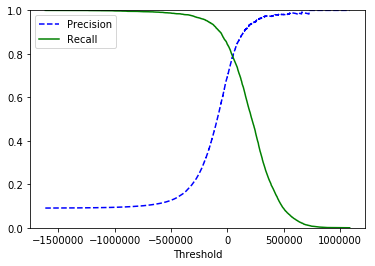

In [39]:
# Recall decreases when threshold increases
# Precision, most of time, increases when threshold gots higher. But sometimes, it blumps. 
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

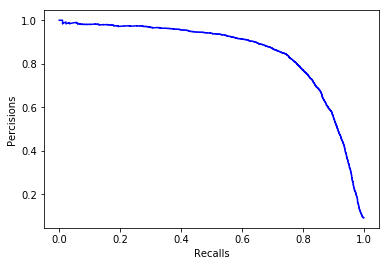

In [40]:
## Plot tradeoff between precision and recall.
plt.plot(recalls, precisions, "b-")
plt.xlabel("Recalls")
plt.ylabel("Percisions")
plt.show()

In [42]:
# With the visualised precision/recall tradeoff
# we can choose the proper threshold we want.

# Decide a 90% of precision as our threshold
# According the Precision/Recoall-Threshold chart, 
# the decision score should be around 70,000
y_train_pred_90 = (y_scores > 70000)

In [45]:
ps = precision_score(y_train_5, y_train_pred_90)
rs = recall_score(y_train_5, y_train_pred_90)
print("The score of Precision: ", ps)
print("The score of Recall: ", rs)

The score of Precision:  0.8252855139250651
The score of Recall:  0.7598229109020476


In [46]:
# ROC Curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

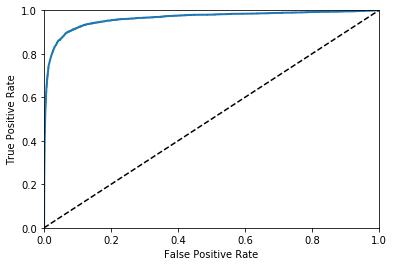

In [48]:
## Plot ROC Curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [49]:
# AUC: Area Under Curve
# It is designed to compare classifiers by measuring the area beneath roc curve of classfiers.
# The close the value to 1, the better the classifer is be
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)


0.9631266256587008

In [52]:
# An example of a comparison between 2 classifiers
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

y_probas_forest = cross_val_predict(
    forest_clf, 
    X_train,
    y_train_5, 
    cv=3, 
    method="predict_proba") # RandomForest does not have decision_function method, use predict proba instead.

In [53]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest) 

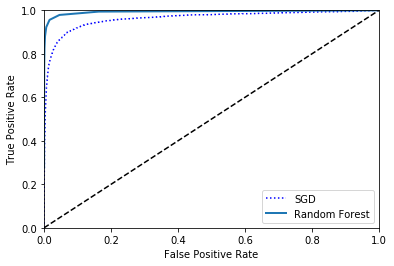

In [55]:
## Plot the ROC
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

array([ 176171.3070972 , -192084.80362971, -480091.65938522, ...,
       -398397.12144709, -488808.86478909, -203576.25169153])